# Importamos librerías

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import statsmodels.api as sm

# Análisis exploratorio de datos

## Datos generales del dataset

Cargamos el dataset obtenido de Kaggle llamado [Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance?datasetId=13720).

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Observamos las 10 primeras muestras.

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Obtenemos la descripción de cada una de las variables cuantitativas del dataset.

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Dividimos el dataset en matriz de características y vector de etiquetas.

In [7]:
X = df.drop("charges", axis=1)
y = df[["charges"]]
X.shape, y.shape

((1338, 6), (1338, 1))

Buscamos valores NaNs en el dataset.

<Axes: >

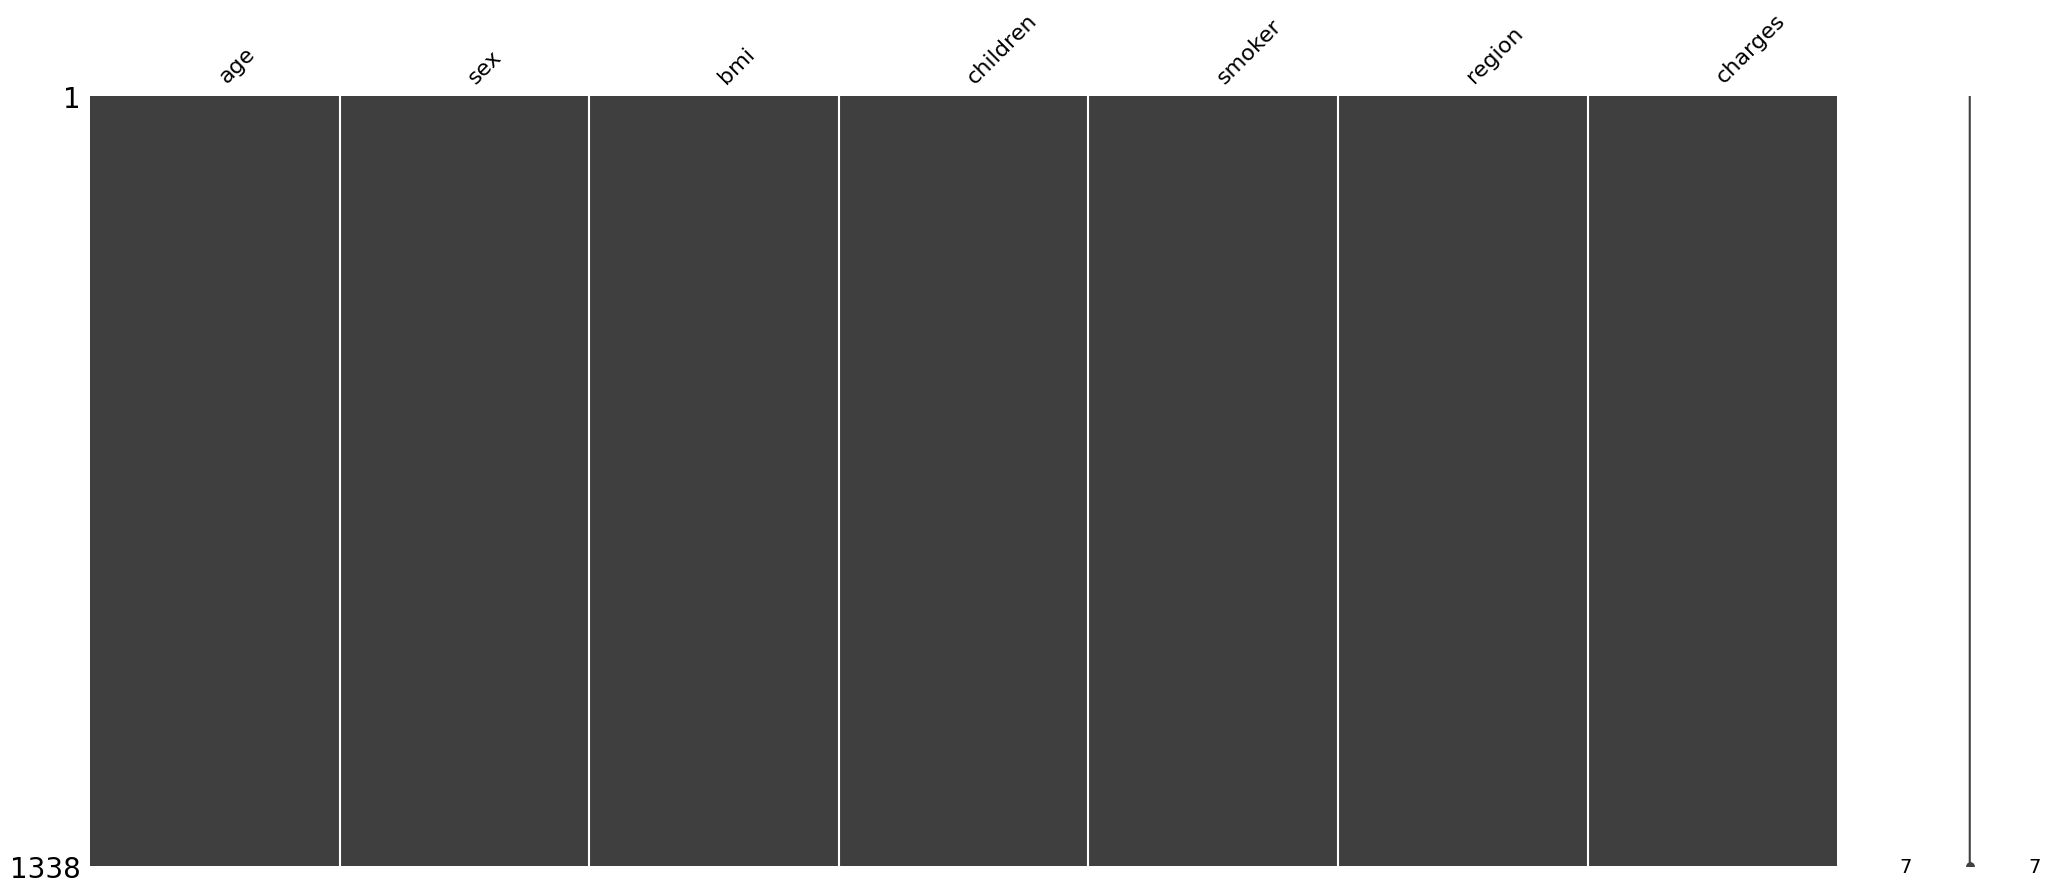

In [8]:
msno.matrix(df)

Puesto que no hay NaNs en el dataset, no se realiza el proceso de limpieza de datos.

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


## Gráficos de cantidad de variables categóricas

Gráficos de las cantidades de cada una de categorías de las variables categóricas.

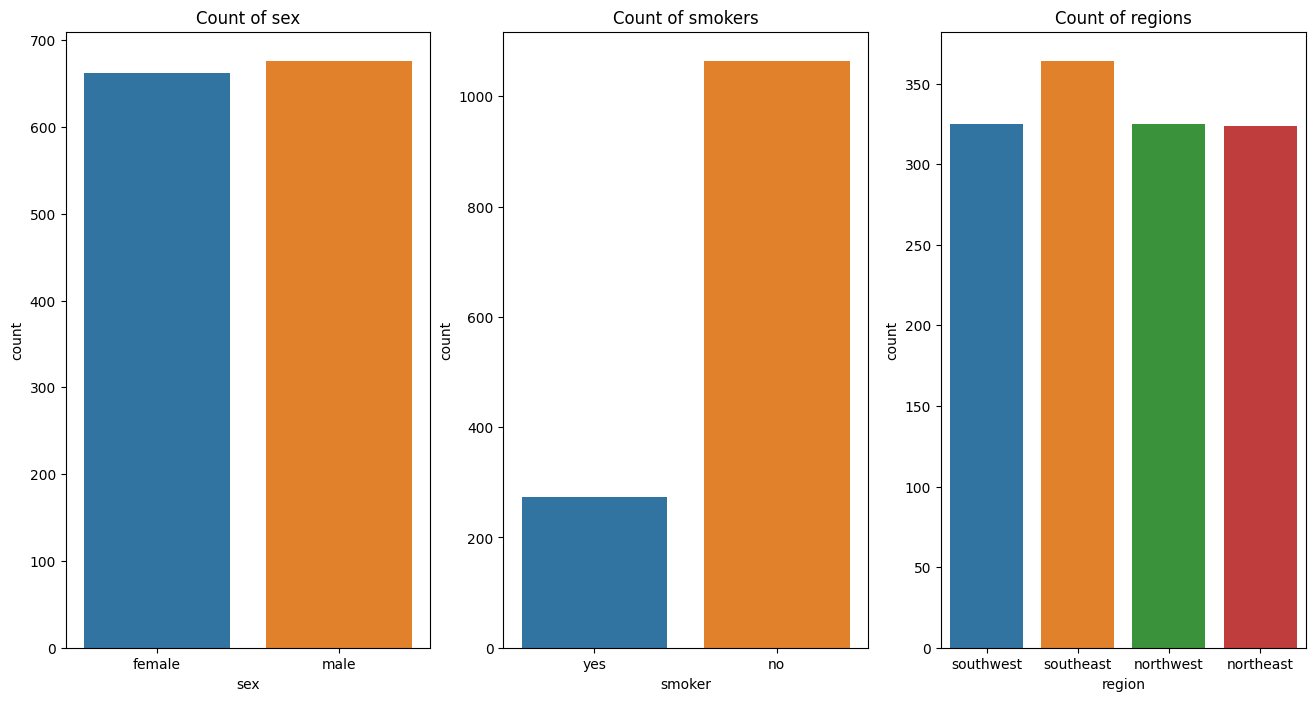

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
sns.countplot(x="sex", data=X, ax=ax[0])
sns.countplot(x="smoker", data=X, ax=ax[1])
sns.countplot(x="region", data=X, ax=ax[2])
ax[0].set_title("Count of sex")
ax[1].set_title("Count of smokers")
ax[2].set_title("Count of regions")
plt.show()

Distribución de las variables categóricas por los cargos del seguro.

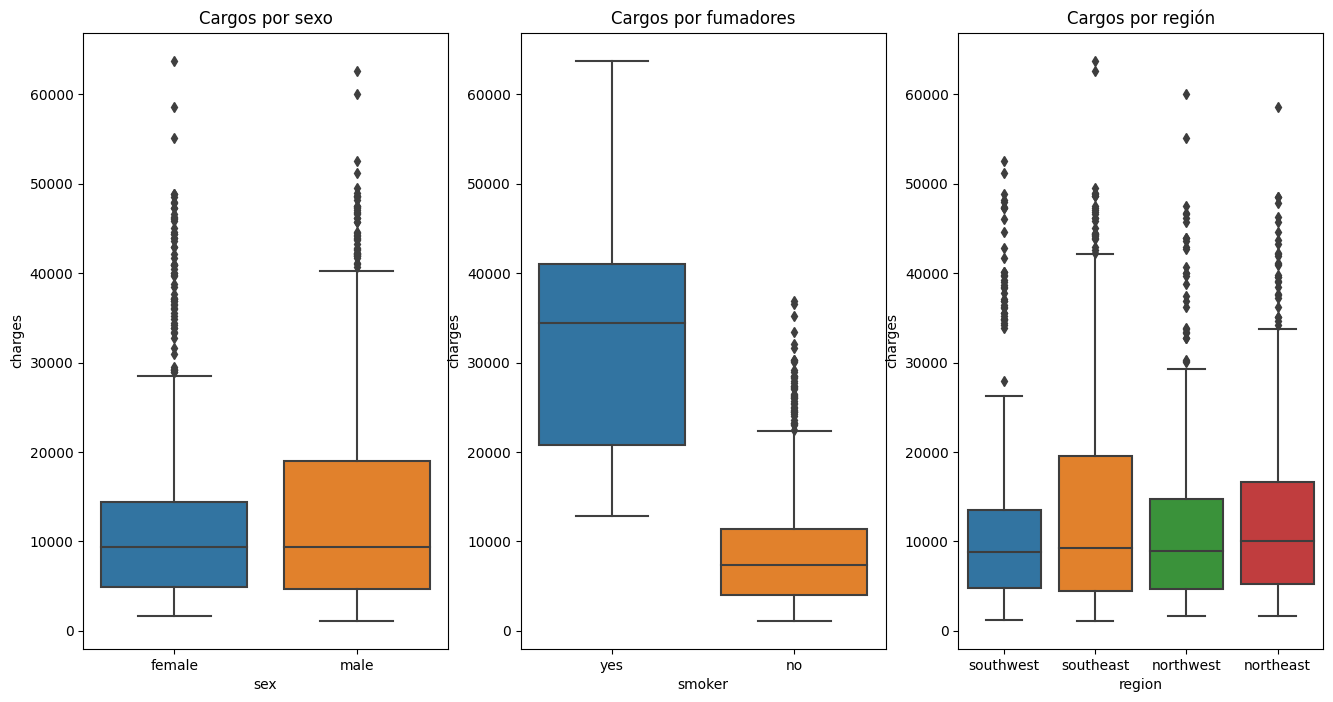

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
sns.boxplot(x="sex", y="charges", data=df, ax=ax[0])
sns.boxplot(x="smoker", y="charges", data=df, ax=ax[1])
sns.boxplot(x="region", y="charges", data=df, ax=ax[2])
ax[0].set_title("Cargos por sexo")
ax[1].set_title("Cargos por fumadores")
ax[2].set_title("Cargos por región")
plt.show()

Graficamos violin plots para tener en una misma gráfica la distribución en cuantiles y en forma de histograma de las variables categóricas.

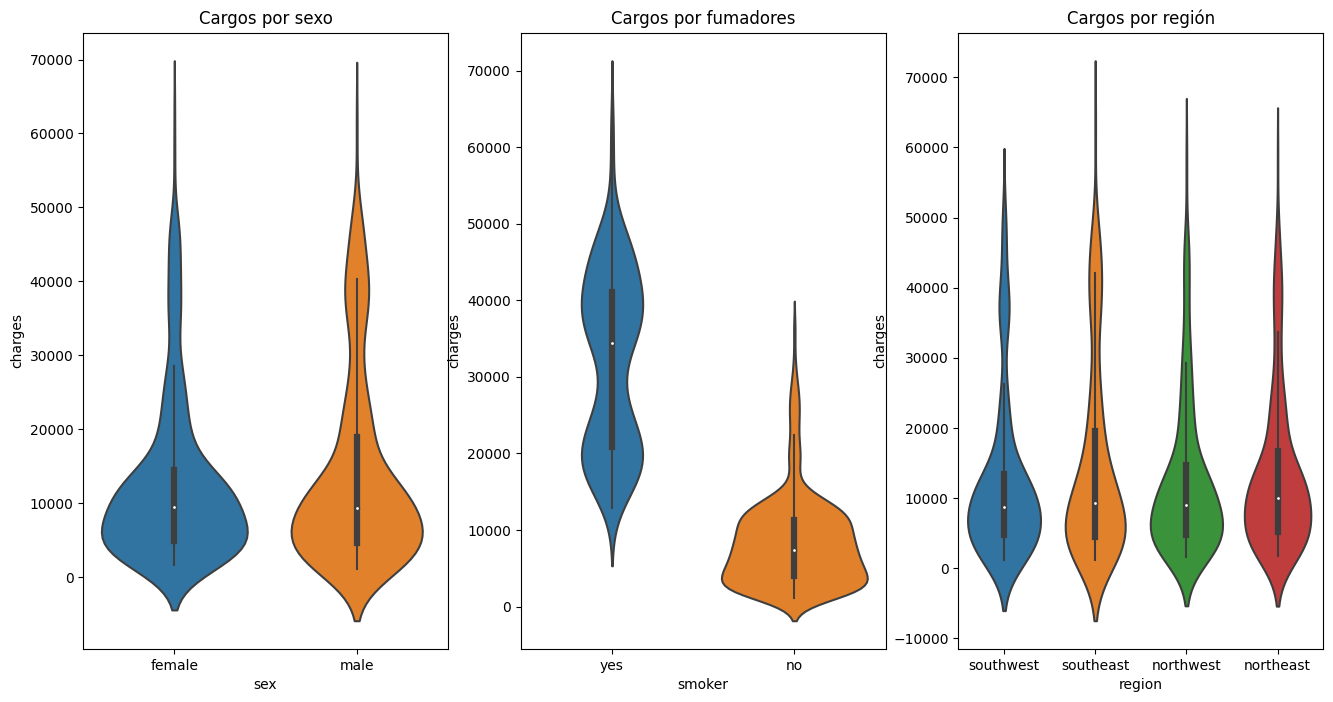

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
sns.violinplot(x="sex", y="charges", data=df, ax=ax[0], kind="violin")
sns.violinplot(x="smoker", y="charges", data=df, ax=ax[1], kind="violin")
sns.violinplot(x="region", y="charges", data=df, ax=ax[2], kind="violin")
ax[0].set_title("Cargos por sexo")
ax[1].set_title("Cargos por fumadores")
ax[2].set_title("Cargos por región")
plt.show()

## Gráficos de distribución de variables cuantitativas

Distribución en histograma de las variables cuantitativas.

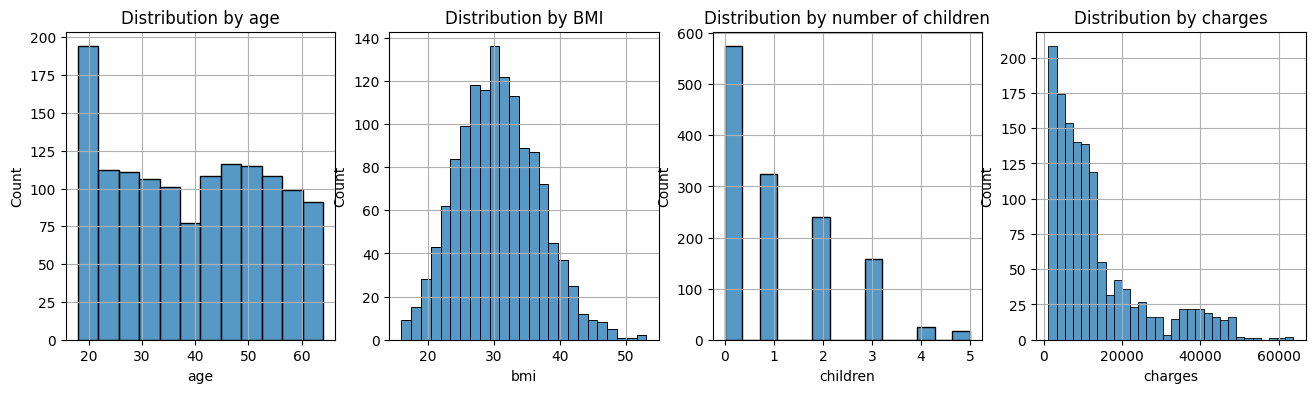

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
sns.histplot(x="age", data=X, ax=ax[0])
sns.histplot(x="bmi", data=X, ax=ax[1])
sns.histplot(x="children", data=X, ax=ax[2])
sns.histplot(x="charges", data=y, ax=ax[3])
ax[0].set_title("Distribution by age")
ax[0].grid(True)
ax[1].set_title("Distribution by BMI")
ax[1].grid(True)
ax[2].set_title("Distribution by number of children")
ax[2].grid(True)
ax[3].set_title("Distribution by charges")
ax[3].grid(True)

Diagrama de caja y bigotes de las variables cuantitativas.

Text(0.5, 1.0, 'Distribution by charges')

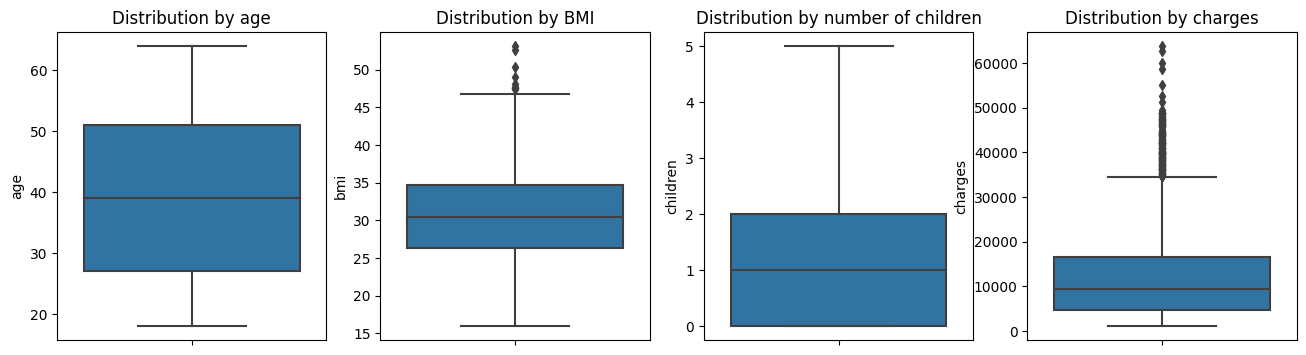

In [14]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
sns.boxplot(y="age", data=X, ax=ax[0])
sns.boxplot(y="bmi", data=X, ax=ax[1])
sns.boxplot(y="children", data=X, ax=ax[2])
sns.boxplot(y="charges", data=y, ax=ax[3])
ax[0].set_title("Distribution by age")
ax[1].set_title("Distribution by BMI")
ax[2].set_title("Distribution by number of children")
ax[3].set_title("Distribution by charges")

## Gráficos de relación X-y entre variables cualitativas y cargos

### Por edad

Verificamos si existe algún tipo de relación entre los cargos del seguro con la edad para los grupos fumadores y no fumdadores y para los grupos de mujeres y hombres.

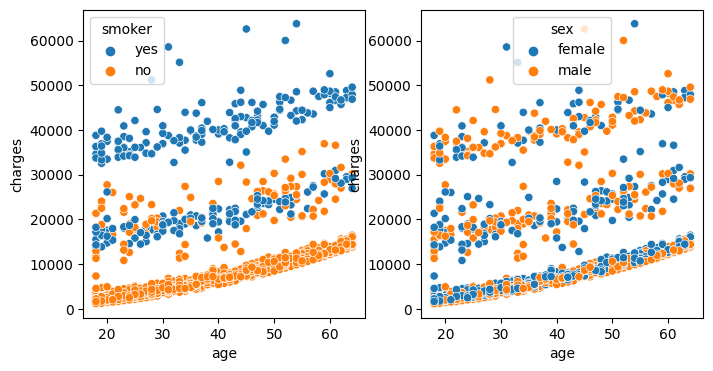

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.scatterplot(x="age", y="charges", hue="smoker", data=df, ax=ax[0])
sns.scatterplot(x="age", y="charges", hue="sex", data=df, ax=ax[1])
plt.show()

No existe una diferencia clara entre los grupos de mujeres y hombres, pero sí en el grupo de fumadores y no fumadores.

Por BMI

Verificamos si existe algún tipo de relación entre los cargos del seguro con el índice de masa corporal para los grupos fumadores y no fumdadores y para los grupos de mujeres y hombres.

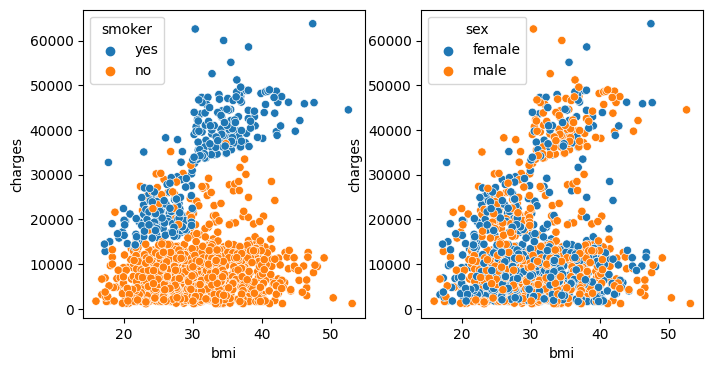

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df, ax=ax[0])
sns.scatterplot(x="bmi", y="charges", hue="sex", data=df, ax=ax[1])
plt.show()

Igualmente, no existe una diferencia clara entre los grupos de mujeres y hombres, pero sí en el grupo de fumadores y no fumadores.

## Pre-procesamiento

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


### Columnas categóricas

Definimos las variables categóricas y usamos OneHotEncoder.

#### Sex

In [18]:
X[["sex"]].value_counts()

sex   
male      676
female    662
dtype: int64

In [19]:
X[["sex"]] = X[["sex"]].astype("category")

In [20]:
pd.Categorical(X["sex"]).categories

Index(['female', 'male'], dtype='object')

In [21]:
one_encoder_sex = OneHotEncoder()
one_encoder_sex_ = one_encoder_sex.fit_transform(X[["sex"]])
one_encoder_sex_.toarray()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

#### Smoker

In [22]:
X[["smoker"]].value_counts()

smoker
no        1064
yes        274
dtype: int64

In [23]:
X[["smoker"]] = X[["smoker"]].astype("category")

In [24]:
pd.Categorical(X["smoker"]).categories

Index(['no', 'yes'], dtype='object')

In [25]:
one_encoder_smoker = OneHotEncoder()
one_encoder_smoker_ = one_encoder_sex.fit_transform(X[["smoker"]])
one_encoder_smoker_.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

#### Region

In [26]:
X[["region"]].value_counts()

region   
southeast    364
northwest    325
southwest    325
northeast    324
dtype: int64

In [27]:
pd.Categorical(X["region"]).categories

Index(['northeast', 'northwest', 'southeast', 'southwest'], dtype='object')

In [28]:
X[["region"]] = X[["region"]].astype("category")

In [29]:
one_encoder_region = OneHotEncoder()
one_encoder_region_ = one_encoder_sex.fit_transform(X[["region"]])
one_encoder_region_.toarray()

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

### Columnas cuantitativas

Estandarizamos las variables cuantitativas usando RobustScaler.

In [30]:
X.select_dtypes(include=["float", "int"]).columns

Index(['age', 'bmi', 'children'], dtype='object')

<Axes: >

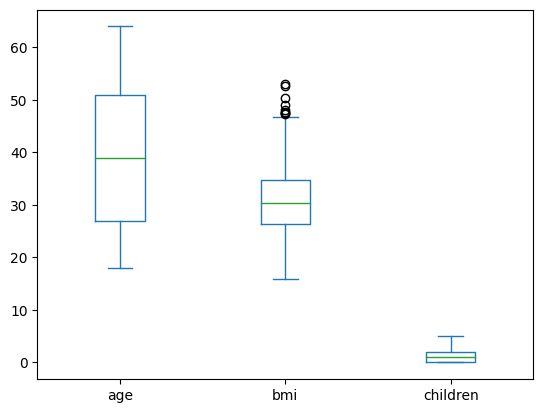

In [31]:
X[["age", "bmi", "children"]].plot(kind="box")

In [32]:
scaler_robust = RobustScaler()
scaler_robust.fit(X[["age", "bmi", "children"]])

RobustScaler()

In [33]:
X_numeric_scaled = scaler_robust.transform(X[["age", "bmi", "children"]])
X_numeric_scaled

array([[-0.83333333, -0.29770765, -0.5       ],
       [-0.875     ,  0.40130991,  0.        ],
       [-0.45833333,  0.30961596,  1.        ],
       ...,
       [-0.875     ,  0.76808574, -0.5       ],
       [-0.75      , -0.54778208, -0.5       ],
       [ 0.91666667, -0.15838047, -0.5       ]])

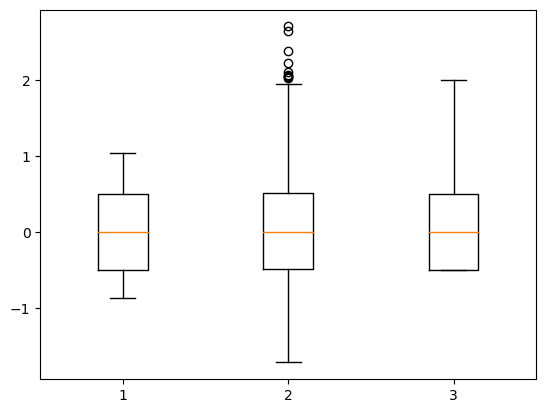

In [34]:
plt.boxplot(X_numeric_scaled)
plt.show()

### Tabla con los datos pre-procesados

Juntamos todos los datos pre-procesados en un único array.

In [35]:
X_scaled_aux = np.vstack([
    X_numeric_scaled[:, 0].reshape(1, -1),
    one_encoder_sex_.toarray()[:, 0].reshape(1, -1),
    one_encoder_sex_.toarray()[:, 1].reshape(1, -1),
    X_numeric_scaled[:, 1].reshape(1, -1),
    X_numeric_scaled[:, 2].reshape(1, -1),
    one_encoder_smoker_.toarray()[:, 0].reshape(1, -1),
    one_encoder_smoker_.toarray()[:, 1].reshape(1, -1),
    one_encoder_region_.toarray()[:, 0].reshape(1, -1),
    one_encoder_region_.toarray()[:, 1].reshape(1, -1),
    one_encoder_region_.toarray()[:, 2].reshape(1, -1),
    one_encoder_region_.toarray()[:, 3].reshape(1, -1),
])

In [36]:
X_scaled_aux.T.shape

(1338, 11)

Generamos un nuevo DataFrame a partir de los datos encontrados.

In [37]:
df_scaled = pd.DataFrame(X_scaled_aux.T, columns=[
    "age_scaled",
    "sex_female",
    "sex_male",
    "bmi_scaled",
    "children_scaled",
    "smoker_no",
    "smoker_yes",
    "region_northeast",
    "region_northwest",
    "region_southeast",
    "region_southwest"
])
df_scaled.head()

,age_scaled,sex_female,sex_male,bmi_scaled,children_scaled,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-0.833333,1.0,0.0,-0.297708,-0.5,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.875000,0.0,1.0,0.401310,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.458333,0.0,1.0,0.309616,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.250000,0.0,1.0,-0.916344,-0.5,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.291667,0.0,1.0,-0.181006,-0.5,1.0,0.0,0.0,1.0,0.0,0.0


Observamos la matriz de correlación entre las variables.

<Axes: >

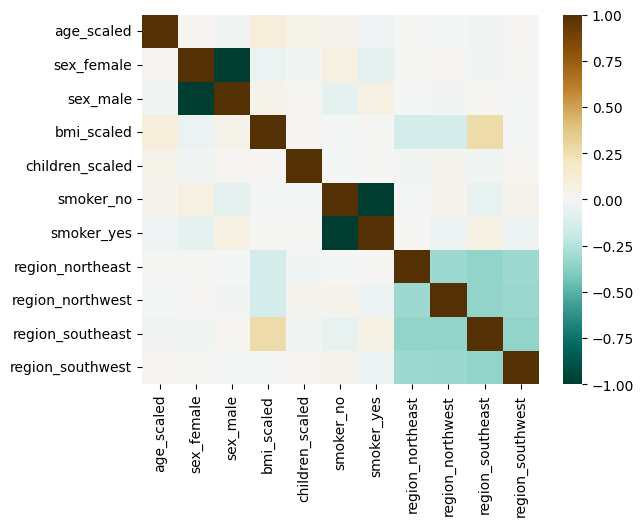

In [38]:
sns.heatmap(df_scaled.corr(), vmin=-1, vmax=1, cmap="BrBG_r")

# Modelos de Regresión

Separamos la data en matriz de características y vector de etiquetas.

In [39]:
X = df_scaled[[
    "age_scaled",
    "sex_female",
    "sex_male",
    "bmi_scaled",
    "children_scaled",
    "smoker_no",
    "smoker_yes",
    "region_northeast",
    "region_northwest",
    "region_southeast",
    "region_southwest"
]].to_numpy()
y = y.to_numpy()

In [40]:
X.shape, y.shape

((1338, 11), (1338, 1))

Separamos en set de entrenamiento y de testeo.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [42]:
X_train.shape, X_test.shape

((1003, 11), (335, 11))

In [43]:
y_train.shape, y_test.shape

((1003, 1), (335, 1))

## Modelos de Regresión Lineal

Los diferentes modelos lineales que se probaron en este Notebook se obtuvieron de la documentación de [Scikit-Learn](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares). Sin embargo, como piden usar modelos vistos en claso, emplearemos únicamente Linear (visto en clase), Ridge y Lasso (modelos con diferente ecuación para resolver el problema).

El modelo de regresión lineal (Linear Regression) responde a la siguiente ecuación para reducir el la suma de cuadrados residuales entre las etiquetas observadas y las predichas:

$$\min_{\omega} ||X_{\omega} - y||^2_2$$

Por otro lado, la regresión de Ridge impone una penalidad en el tamaño de los coeficientes, de forma que sus coeficientes minimizan la suma residual de cuadrados penalizados con:

$$\min_{\omega}||X_{\omega} - y||^2_2 + \alpha ||\omega||^2_2$$

Finalmente, el modelo de regresión Lasso consiste en un modelo lineal con un término de regularización agregado. La función objetivo a minimizar es:

$$\min_{\omega} \frac{1}{2n_{samples}} ||X_{\omega}-y||^2_2 + \alpha ||\omega||_1$$

In [44]:
model_list = [LinearRegression(), Ridge(random_state=42), Lasso(random_state=42)]
model_name_list = ["Linear Regression", "Ridge", "Lasso"]
metrics_list = ["R2", "MSE", "MAE"]
r2_list = []
mse_list = []
mae_list = []

In [45]:
for model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_list.append(r2_score(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    mae_list.append(mean_absolute_error(y_test, y_pred))

Para cuantificar el rendimiento de los modelos se usará $R^2$, Mean Squared Error (MSE), y Mean Absolute Error (MAE).

In [46]:
performance_df = pd.DataFrame(
    index = metrics_list,
    columns = model_name_list,
    data=[r2_list, mse_list, mae_list]
).T
pd.options.display.precision = 3
performance_df

,R2,MSE,MAE
Linear Regression,0.767,3.513e+07,4240.160
Ridge,0.767,3.514e+07,4249.104
Lasso,0.767,3.512e+07,4243.932


Por las características de ambos modelos, se entiende que los resultados son similares. No obstante, por sus formas de manejar los residuales se obtienen métricas ligeramente distintas en MSE y MAE.

## Modelos de Regresión Polinomial

Crearemos una matriz de características de hasta potencia 4 para no extender mucho las características. Usaremos el modelo con mejor rendimiento.

In [47]:
poly2 = PolynomialFeatures(2)
poly3 = PolynomialFeatures(3)
poly4 = PolynomialFeatures(4)
polyi = PolynomialFeatures(interaction_only=True)

In [48]:
X_2_train = poly2.fit_transform(X_train)
X_3_train = poly3.fit_transform(X_train)
X_4_train = poly4.fit_transform(X_train)
X_i_train = polyi.fit_transform(X_train)
X_2_train.shape, X_3_train.shape, X_4_train.shape, X_i_train.shape

((1003, 78), (1003, 364), (1003, 1365), (1003, 67))

In [49]:
X_2_test = poly2.transform(X_test)
X_3_test = poly3.transform(X_test)
X_4_test = poly4.transform(X_test)
X_i_test = polyi.transform(X_test)
X_2_test.shape, X_3_test.shape, X_4_train.shape, X_i_test.shape

((335, 78), (335, 364), (1003, 1365), (335, 67))

In [50]:
model_list = [LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression()]
model_name_list = ["LR (p=1)", "LR (p=2)", "LR (p=3)", "LR (p=4)", "LR (interaction)"]
train_data = [X_train, X_2_train, X_3_train, X_4_train, X_i_train]
test_data = [X_test, X_2_test, X_3_test, X_4_test, X_i_test]
metrics_list = ["R2", "MSE", "MAE"]
r2_list = []
mse_list = []
mae_list = []

In [51]:
for i, model in enumerate(model_list):
    model.fit(train_data[i], y_train)
    y_pred = model.predict(test_data[i])
    r2_list.append(r2_score(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    mae_list.append(mean_absolute_error(y_test, y_pred))

In [52]:
performance_df = pd.DataFrame(
    index = metrics_list,
    columns = model_name_list,
    data=[r2_list, mse_list, mae_list]
).T
pd.options.display.precision = 3
performance_df

,R2,MSE,MAE
LR (p=1),0.767,3.513e+07,4240.160
LR (p=2),0.854,2.199e+07,2777.496
LR (p=3),0.840,2.408e+07,3004.886
LR (p=4),0.721,4.204e+07,3718.246
LR (interaction),0.850,2.262e+07,2786.102


Notemos que el modelo que mejor describe la relación entre las características y los cargos del seguro es el modelo de grado 2.

## Modelos de Regresión no Lineal

Se usarán algunos modelos de regresión no lineal especificados en clase tales como el Boosted Decision Tree Regressor y KNN Regression. No obstante, también se agregaron modelos como Random Forest Regression y XGBoost Regression.

In [53]:
model_list = [
    AdaBoostRegressor(DecisionTreeRegressor(random_state=42)),
    KNeighborsRegressor(),
    RandomForestRegressor(random_state=42),
    XGBRegressor()
]
model_name_list = [
    "Boosted Decision Tree Regressor",
    "KNN Regression",
    "Random Forest Regression",
    "XGBoost Regression"]
metrics_list = ["R2", "MSE", "MAE"]
r2_list = []
mse_list = []
mae_list = []

In [54]:
for model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_list.append(r2_score(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    mae_list.append(mean_absolute_error(y_test, y_pred))

c:\Users\eavil\anaconda3\envs\patrones\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eavil\AppData\Local\Temp\ipykernel_37308\3832170472.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [55]:
performance_df = pd.DataFrame(
    index = metrics_list,
    columns = model_name_list,
    data=[r2_list, mse_list, mae_list]
).T
pd.options.display.precision = 3
performance_df

,R2,MSE,MAE
Boosted Decision Tree Regressor,0.842,2.390e+07,2188.769
KNN Regression,0.794,3.111e+07,3469.485
Random Forest Regression,0.848,2.289e+07,2608.066
XGBoost Regression,0.826,2.632e+07,2804.655


En este caso, el mejor modelo es el Boosted Decision Tree Regressor, sin embargo, estos valores son mejorables pues aún no se realizó el proceso de tuneo de hiperparámetros. Por la naturaleza del Challenge, no se realizará este procedimiento pues lo que se busca es verificar el uso de Regresión en el dataset.

# Mejor modelo

A partir de las métricas escogidas, notamos que el mejor modelo es el de regresión polinómica de orden 2, por lo que lo usaremos para visualizar mejor las predicciones de la misma.

In [56]:
model = LinearRegression()
model.fit(X_2_train, y_train)
y_pred = model.predict(X_2_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [57]:
print(f"R2: {r2:.2f} | MSE: {mse:.2f} | MAE: {mae:.2f}")

R2: 0.85 | MSE: 21991911.44 | MAE: 2777.50


Gráfica que compara el valor predicho con el valor observado. Notemos que para la mayoría de valores de cargos, el modelo predice correctamente los valores, sin embargo, aún existen algunas observaciones donde el modelo sobreestima el cargo del seguro.

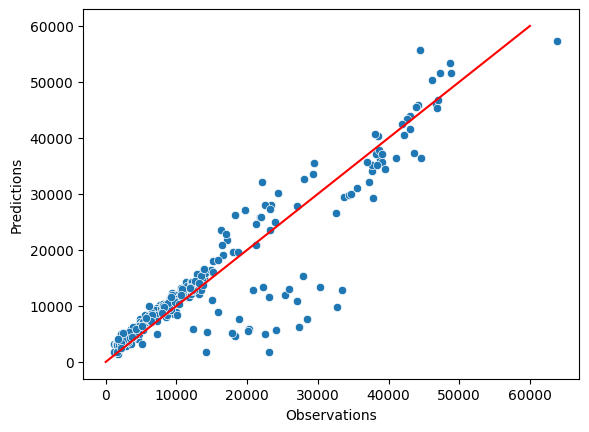

In [58]:
fig, ax = plt.subplots()
sns.scatterplot(x=y_test.squeeze(), y=y_pred.squeeze())
ax.set_xlabel("Observations")
ax.set_ylabel("Predictions")
ax.plot([0, 60000], [0, 60000], color="red")

Observamos el valor de los residuales.

C:\Users\eavil\AppData\Local\Temp\ipykernel_37308\681184782.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred))


<Axes: ylabel='Density'>

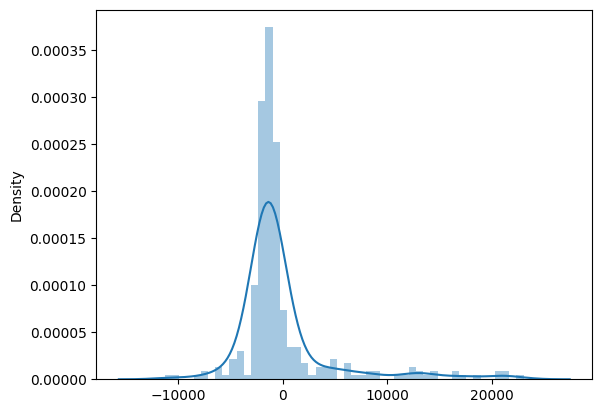

In [59]:
sns.distplot((y_test - y_pred))

Gráfica que compara el valor predicho con el valor observado para todo el dataset.

In [63]:
y_pred = model.predict(poly2.transform(X))
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

In [64]:
print(f"R2: {r2:.2f} | MSE: {mse:.2f} | MAE: {mae:.2f}")

R2: 0.85 | MSE: 22471958.91 | MAE: 2847.07


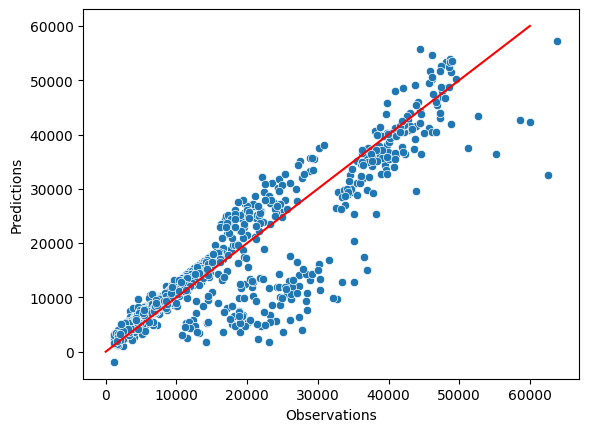

In [65]:
fig, ax = plt.subplots()
sns.scatterplot(x=y.squeeze(), y=model.predict(poly2.transform(X)).squeeze())
ax.set_xlabel("Observations")
ax.set_ylabel("Predictions")
ax.plot([0, 60000], [0, 60000], color="red")

Observamos el valor de los residuales.

C:\Users\eavil\AppData\Local\Temp\ipykernel_37308\3619177720.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y - y_pred))


<Axes: ylabel='Density'>

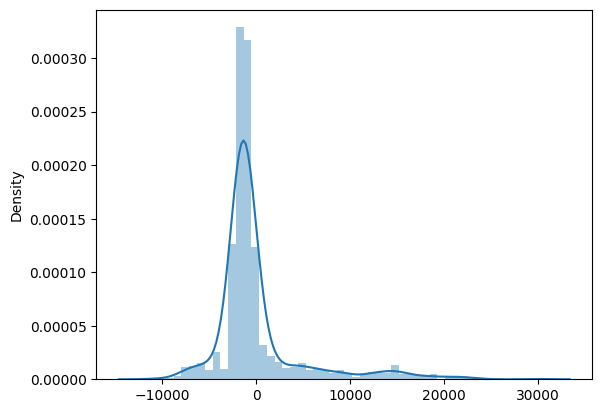

In [67]:
sns.distplot((y - y_pred))